# Example of various pivpy methods

In [20]:
from pivpy import io, pivpy, graphics
import numpy as np
import xarray as xr
import os
import pkg_resources as pkg
import pathlib

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
f1 = 'Run000001.T000.D000.P000.H001.L.vec'
f2 = 'Run000002.T000.D000.P000.H001.L.vec'

path = pathlib.Path(pkg.resource_filename('pivpy','data'))


a = io.load_vec(path / "Insight" / f1 )
b = io.load_vec(path / "Insight" / f2 )

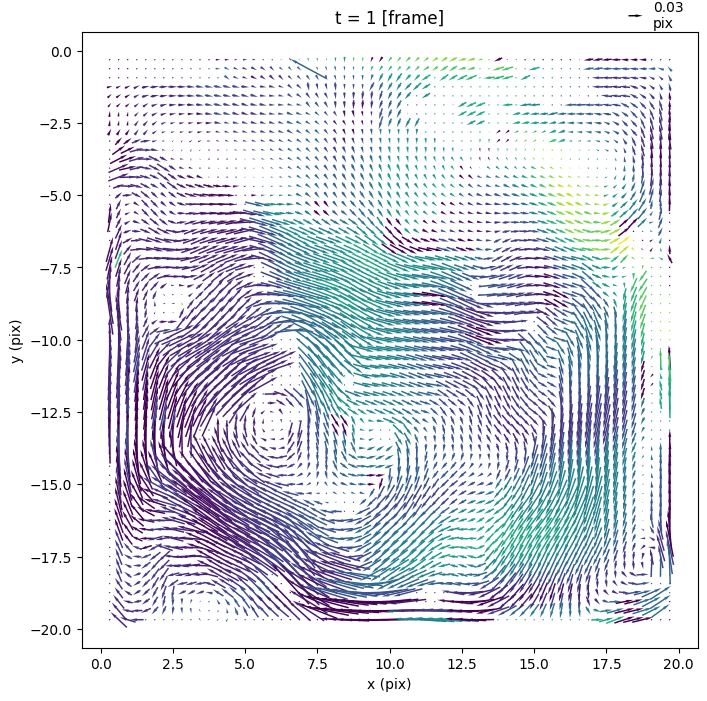

In [22]:
# select where t = 1 (explicit time)
fig, ax = graphics.quiver(a.sel(t=1),arrScale=10)

#increase figure size
fig.set_size_inches(11,8)

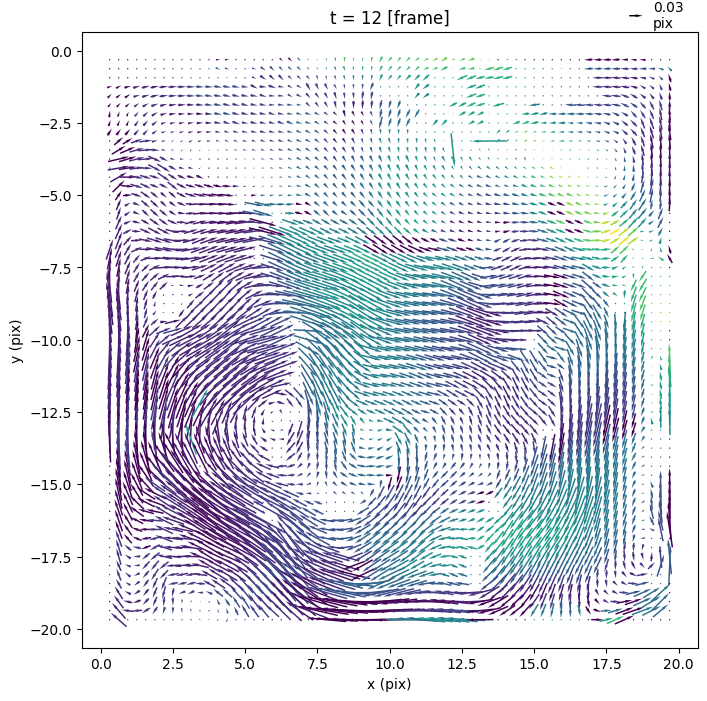

In [23]:
# select just the first frame whatever t is .
b['t'] = b['t'] + 10
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(b.isel(t=0),arrScale=10,nthArr=2)

In [24]:
c = a.piv.crop([5, 15,-5,-15])
a.u.shape, c.u.shape

((63, 63, 1), (32, 32, 1))

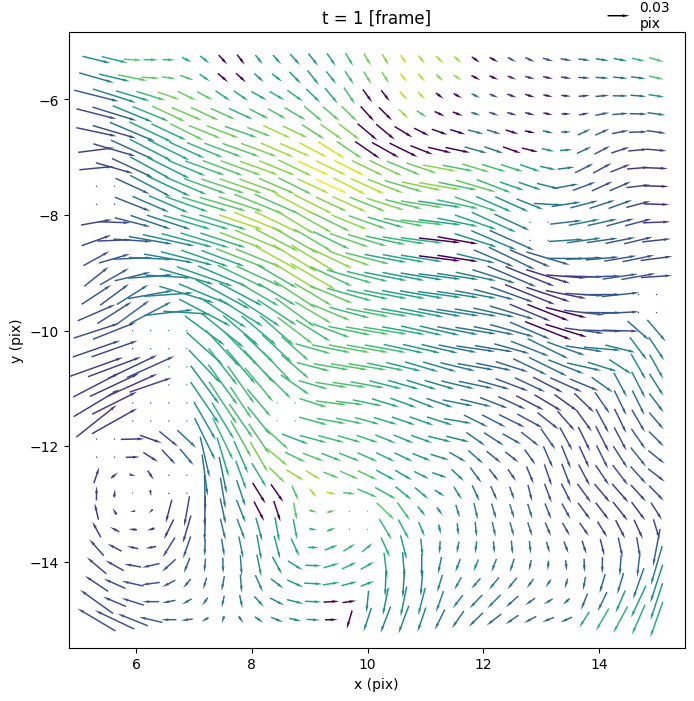

In [25]:
# define size before the plot
plt.figure(figsize=(11,8))

# show less vectors using nthArr 
fig, ax = graphics.quiver(c.isel(t=0),arrScale=10,nthArr=2)

In [26]:
# let's play with some synthetic data 
c = io.create_sample_Dataset()

In [27]:
# want to slice it and not crop? 
d = c.sel(x = slice(35,70),y=slice(30,90))
print(d)

<xarray.Dataset>
Dimensions:  (x: 1, y: 4, t: 5)
Coordinates:
  * x        (x) int64 64
  * y        (y) int64 32 48 64 80
  * t        (t) int64 0 1 2 3 4
Data variables:
    u        (y, x, t) float64 6.0 6.0 6.0 6.0 6.0 6.0 ... 6.0 6.0 6.0 6.0 6.0
    v        (y, x, t) float64 -0.5 -0.5 -0.5 -0.5 -0.5 ... 1.0 1.0 1.0 1.0 1.0
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes: (2)


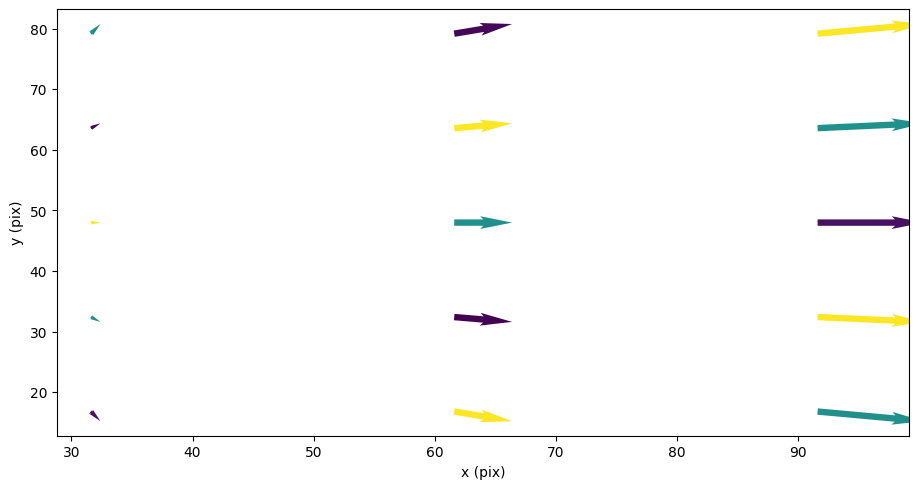

In [28]:
# want to show an ensemble average of 10 frames?
data = io.create_sample_Dataset(10)

# want to change the size of arrows and figure aspectratio?
fig,_=graphics.quiver(data.piv.average,arrScale=8,aspectratio=0.5)
fig.set_size_inches(11,8)

In [29]:
data = io.create_sample_field()
data.piv.strain()

<xarray.Dataset>
Dimensions:  (x: 8, y: 5, t: 1)
Coordinates:
  * x        (x) int64 32 64 96 128 160 192 224 256
  * y        (y) int64 16 32 48 64 80
  * t        (t) int64 0
Data variables:
    u        (y, x, t) float64 0.2494 2.085 3.701 6.114 ... 8.492 7.268 12.87
    v        (y, x, t) float64 -1.576 -1.576 -1.576 -1.576 ... 3.811 3.811 3.811
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 0.008422 0.008039 0.009092 ... 0.03774 0.06372
Attributes: (2)

In [30]:
data.piv.vorticity()
data

<xarray.Dataset>
Dimensions:  (x: 8, y: 5, t: 1)
Coordinates:
  * x        (x) int64 32 64 96 128 160 192 224 256
  * y        (y) int64 16 32 48 64 80
  * t        (t) int64 0
Data variables:
    u        (y, x, t) float64 0.2494 2.085 3.701 6.114 ... 8.492 7.268 12.87
    v        (y, x, t) float64 -1.576 -1.576 -1.576 -1.576 ... 3.811 3.811 3.811
    chc      (y, x, t) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    w        (y, x, t) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (2)